In [1]:
import numpy as np, tensorflow as tf
from glob import glob
from analysis import plot_deep_features, plot, smooth_ranges_2d, text
from make_frames import make_frames

In [2]:
import os
import h5py
from pprint import pprint
from tqdm import tqdm
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [3]:
%%sh
cd data/
ls -l

total 2225616
drwxrwxr-x 2 ubuntu ubuntu      4096 Oct 10 08:40 archive
-rw-rw-r-- 1 ubuntu ubuntu 360325126 Oct 10 22:33 lambda_0.001.h5
-rw-rw-r-- 1 ubuntu ubuntu 360325126 Oct 10 22:33 lambda_0.01.h5
-rw-rw-r-- 1 ubuntu ubuntu 360325126 Oct 10 08:48 lambda_0.1.h5
-rw-rw-r-- 1 ubuntu ubuntu 270406726 Oct 10 22:32 lambda_0.h5
-rw-rw-r-- 1 ubuntu ubuntu 360325126 Oct 10 08:48 lambda_1.h5
-rw-rw-r-- 1 ubuntu ubuntu 360325126 Oct 10 08:48 lambda_3.h5
-rw-rw-r-- 1 ubuntu ubuntu 206948030 Oct 10 22:31 pre_train_lambda_0.01.h5


In [4]:
%%sh
cd figures/animation/
ls -l

total 53500
drwxrwxr-x 9 ubuntu ubuntu     4096 Oct 10 08:55 archive
drwxrwxr-x 2 ubuntu ubuntu     4096 Oct 10 08:56 lambda_0.001
drwxrwxr-x 2 ubuntu ubuntu     4096 Oct 11 08:07 lambda_0.01
drwxrwxr-x 2 ubuntu ubuntu     4096 Oct 11 08:07 lambda_0.1
drwxrwxr-x 2 ubuntu ubuntu     4096 Oct 11 08:07 lambda_1
drwxrwxr-x 2 ubuntu ubuntu    20480 Oct 10 09:38 lambda_3
-rw-rw-r-- 1 ubuntu ubuntu 13046511 Oct 10 09:39 MNIST_LeNet_centroid_lambda_3.mp4
-rw-r--r-- 1 ubuntu ubuntu   461311 Oct  8 18:02 MNIST_LeNet_centroid_loss_01_faster.mp4
-rw-rw-r-- 1 ubuntu ubuntu  3176114 Oct  9 08:29 MNIST_LeNet_centroid_weak_test.mp4
-rw-rw-r-- 1 ubuntu ubuntu 25460482 Oct  9 21:17 MNIST_LeNet_long_centroid_test.mp4
-rw-rw-r-- 1 ubuntu ubuntu 12583274 Oct 11 04:11 MNIST_LeNet_pre_train_lambda_0.01.mp4
drwxrwxr-x 2 ubuntu ubuntu     4096 Oct 11 08:26 pre_train_lambda_0.01


In [5]:
configs = [
    
    {
        'path': 'data/pre_train_lambda_0.01.h5',
        'prefix': 'pre_train_lambda_0.01/frame'
    },
    {
        'path': 'data/lambda_3.h5',
        'prefix': 'lambda_3/frame'
    },
    {
        'path': 'data/lambda_1.h5',
        'prefix': 'lambda_1/frame'
    },
    {
        'path': 'data/lambda_0.1.h5',
        'prefix': 'lambda_0.1/frame'
    },
    {
        'path': 'data/lambda_0.01.h5',
        'prefix': 'lambda_0.01/frame'
    },
    {
        'path': 'data/lambda_0.001.h5',
        'prefix': 'lambda_0.001/frame'
    }
]

In [6]:
def make_movie(config):
    filepath = config['path']
    frame_prefix = config['prefix']
    make_frames(filepath, frame_prefix, title="MNIST LeNet++ Centroid Loss")

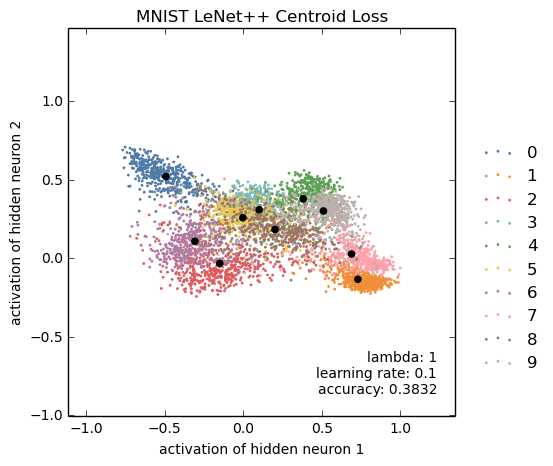

  2%|▏         | 12/561 [00:54<41:53,  4.58s/it]

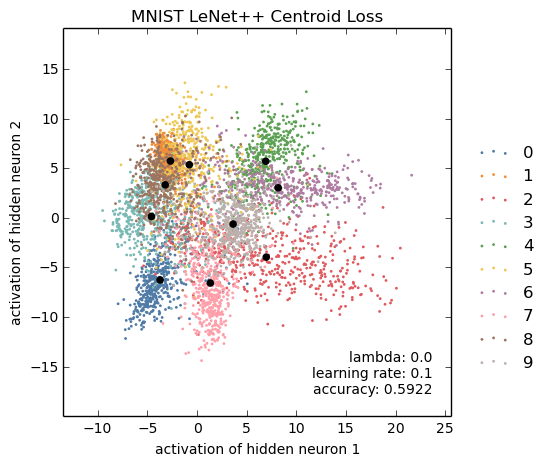

  4%|▎         | 12/321 [00:55<22:02,  4.28s/it]

In [ ]:
from multiprocessing import Pool
with Pool(4) as p:
    p.map(make_movie, configs)

In [9]:
%%sh
# sudo shutdown -h now

shutdown: Need to be root


In [5]:
%%sh
cd figures/animation/pre_train_lambda_0.01
rm ../MNIST_LeNet_pre_train_lambda_0.01.mp4
ffmpeg -framerate 10 -i frame_%03d.png -c:v libx264 -r 30 -pix_fmt yuv420p -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" ../MNIST_LeNet_pre_train_lambda_0.01.mp4

ffmpeg version N-80901-gfebc862 Copyright (c) 2000-2016 the FFmpeg developers
  built with gcc 4.8 (Ubuntu 4.8.4-2ubuntu1~14.04.3)
  configuration: --extra-libs=-ldl --prefix=/opt/ffmpeg --mandir=/usr/share/man --enable-avresample --disable-debug --enable-nonfree --enable-gpl --enable-version3 --enable-libopencore-amrnb --enable-libopencore-amrwb --disable-decoder=amrnb --disable-decoder=amrwb --enable-libpulse --enable-libfreetype --enable-gnutls --enable-libx264 --enable-libx265 --enable-libfdk-aac --enable-libvorbis --enable-libmp3lame --enable-libopus --enable-libvpx --enable-libspeex --enable-libass --enable-avisynth --enable-libsoxr --enable-libxvid --enable-libvidstab
  libavutil      55. 28.100 / 55. 28.100
  libavcodec     57. 48.101 / 57. 48.101
  libavformat    57. 41.100 / 57. 41.100
  libavdevice    57.  0.102 / 57.  0.102
  libavfilter     6. 47.100 /  6. 47.100
  libavresample   3.  0.  0 /  3.  0.  0
  libswscale      4.  1.100 /  4.  1.100
  libswresample   2.  1.100 /

In [10]:
%%sh
cd figures/animation/lambda_3
ffmpeg -framerate 10 -i frame_%03d.png -c:v libx264 -r 30 -pix_fmt yuv420p -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" ../MNIST_LeNet_lambda_3.mp4

ffmpeg version N-80901-gfebc862 Copyright (c) 2000-2016 the FFmpeg developers
  built with gcc 4.8 (Ubuntu 4.8.4-2ubuntu1~14.04.3)
  configuration: --extra-libs=-ldl --prefix=/opt/ffmpeg --mandir=/usr/share/man --enable-avresample --disable-debug --enable-nonfree --enable-gpl --enable-version3 --enable-libopencore-amrnb --enable-libopencore-amrwb --disable-decoder=amrnb --disable-decoder=amrwb --enable-libpulse --enable-libfreetype --enable-gnutls --enable-libx264 --enable-libx265 --enable-libfdk-aac --enable-libvorbis --enable-libmp3lame --enable-libopus --enable-libvpx --enable-libspeex --enable-libass --enable-avisynth --enable-libsoxr --enable-libxvid --enable-libvidstab
  libavutil      55. 28.100 / 55. 28.100
  libavcodec     57. 48.101 / 57. 48.101
  libavformat    57. 41.100 / 57. 41.100
  libavdevice    57.  0.102 / 57.  0.102
  libavfilter     6. 47.100 /  6. 47.100
  libavresample   3.  0.  0 /  3.  0.  0
  libswscale      4.  1.100 /  4.  1.100
  libswresample   2.  1.100 /

In [11]:
%%sh
cd figures/animation/lambda_0.1
ffmpeg -framerate 10 -i frame_%03d.png -c:v libx264 -r 30 -pix_fmt yuv420p -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" ../MNIST_LeNet_lambda_0.1.mp4

ffmpeg version N-80901-gfebc862 Copyright (c) 2000-2016 the FFmpeg developers
  built with gcc 4.8 (Ubuntu 4.8.4-2ubuntu1~14.04.3)
  configuration: --extra-libs=-ldl --prefix=/opt/ffmpeg --mandir=/usr/share/man --enable-avresample --disable-debug --enable-nonfree --enable-gpl --enable-version3 --enable-libopencore-amrnb --enable-libopencore-amrwb --disable-decoder=amrnb --disable-decoder=amrwb --enable-libpulse --enable-libfreetype --enable-gnutls --enable-libx264 --enable-libx265 --enable-libfdk-aac --enable-libvorbis --enable-libmp3lame --enable-libopus --enable-libvpx --enable-libspeex --enable-libass --enable-avisynth --enable-libsoxr --enable-libxvid --enable-libvidstab
  libavutil      55. 28.100 / 55. 28.100
  libavcodec     57. 48.101 / 57. 48.101
  libavformat    57. 41.100 / 57. 41.100
  libavdevice    57.  0.102 / 57.  0.102
  libavfilter     6. 47.100 /  6. 47.100
  libavresample   3.  0.  0 /  3.  0.  0
  libswscale      4.  1.100 /  4.  1.100
  libswresample   2.  1.100 /

In [12]:
%%sh
cd figures/animation/lambda_0.01
ffmpeg -framerate 10 -i frame_%03d.png -c:v libx264 -r 30 -pix_fmt yuv420p -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" ../MNIST_LeNet_lambda_0.01.mp4

ffmpeg version N-80901-gfebc862 Copyright (c) 2000-2016 the FFmpeg developers
  built with gcc 4.8 (Ubuntu 4.8.4-2ubuntu1~14.04.3)
  configuration: --extra-libs=-ldl --prefix=/opt/ffmpeg --mandir=/usr/share/man --enable-avresample --disable-debug --enable-nonfree --enable-gpl --enable-version3 --enable-libopencore-amrnb --enable-libopencore-amrwb --disable-decoder=amrnb --disable-decoder=amrwb --enable-libpulse --enable-libfreetype --enable-gnutls --enable-libx264 --enable-libx265 --enable-libfdk-aac --enable-libvorbis --enable-libmp3lame --enable-libopus --enable-libvpx --enable-libspeex --enable-libass --enable-avisynth --enable-libsoxr --enable-libxvid --enable-libvidstab
  libavutil      55. 28.100 / 55. 28.100
  libavcodec     57. 48.101 / 57. 48.101
  libavformat    57. 41.100 / 57. 41.100
  libavdevice    57.  0.102 / 57.  0.102
  libavfilter     6. 47.100 /  6. 47.100
  libavresample   3.  0.  0 /  3.  0.  0
  libswscale      4.  1.100 /  4.  1.100
  libswresample   2.  1.100 /

In [13]:
%%sh
cd figures/animation/lambda_0.001
ffmpeg -framerate 10 -i frame_%03d.png -c:v libx264 -r 30 -pix_fmt yuv420p -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" ../MNIST_LeNet_lambda_0.001.mp4

ffmpeg version N-80901-gfebc862 Copyright (c) 2000-2016 the FFmpeg developers
  built with gcc 4.8 (Ubuntu 4.8.4-2ubuntu1~14.04.3)
  configuration: --extra-libs=-ldl --prefix=/opt/ffmpeg --mandir=/usr/share/man --enable-avresample --disable-debug --enable-nonfree --enable-gpl --enable-version3 --enable-libopencore-amrnb --enable-libopencore-amrwb --disable-decoder=amrnb --disable-decoder=amrwb --enable-libpulse --enable-libfreetype --enable-gnutls --enable-libx264 --enable-libx265 --enable-libfdk-aac --enable-libvorbis --enable-libmp3lame --enable-libopus --enable-libvpx --enable-libspeex --enable-libass --enable-avisynth --enable-libsoxr --enable-libxvid --enable-libvidstab
  libavutil      55. 28.100 / 55. 28.100
  libavcodec     57. 48.101 / 57. 48.101
  libavformat    57. 41.100 / 57. 41.100
  libavdevice    57.  0.102 / 57.  0.102
  libavfilter     6. 47.100 /  6. 47.100
  libavresample   3.  0.  0 /  3.  0.  0
  libswscale      4.  1.100 /  4.  1.100
  libswresample   2.  1.100 /